# Polynomial Regression

### Generating Random data on curve 


Seed was: 10
-6e+00*x^0-7e+00*x^1+3e+00*x^2-2e+00*x^3

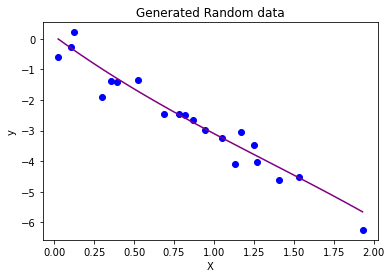

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing as preprocessing
nsample=20
degree=3

#seed = np.random.randint(200)
#rng = np.random.seed(seed)
seed=10
print("Seed was:", seed)

X = 2 * np.random.rand(nsample, 1)

poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly_features.fit_transform(X)

scaler = preprocessing.MinMaxScaler()
X_poly_scale = scaler.fit_transform(X_poly)

theta =5* np.random.randn(degree + 1, 1)
y = X_poly_scale.dot(theta)+0.5*np.random.randn(nsample, 1)

for i in range(degree+1):
    print('{:+0.1}*x^{}'.format(*theta[i],i),end="")
    
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
X_plot_poly_scale = scaler.fit_transform(X_plot_poly)

y_true = X_plot_poly_scale.dot(theta)

plt.scatter(X, y, color='blue')
plt.plot(X_plot, y_true, color='purple')
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Generated Random data') 
plt.show()



### initialize parameters and adding quadratic features to X

In [25]:
from sklearn import preprocessing
# you can set degree of polynomial from 1-5 with 0.01 learning rate with increased degree you should lower learning rate
learning_rate = 0.01
iterations = 50000

degree1 = 5
poly_features = PolynomialFeatures(degree=degree1, include_bias=True)
X_poly = poly_features.fit_transform(X)
scaler = preprocessing.MinMaxScaler()
X_poly_scale = scaler.fit_transform(X_poly)
print(np.shape(X))
print(np.shape(X_poly))
print(X[0])
print(X_poly[0])
print(X_poly_scale[0])
theta = 0.01*np.random.randn(degree1 + 1, 1)
print(np.shape(theta))

X_poly=X_poly_scale

(20, 1)
(20, 6)
[0.39391295]
[1.         0.39391295 0.15516741 0.06112245 0.02407693 0.00948421]
[0.         0.19380225 0.04145414 0.00848487 0.0017311  0.00035311]
(6, 1)


### training

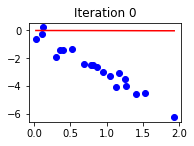

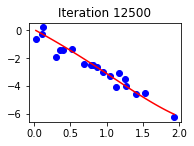

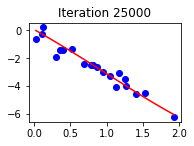

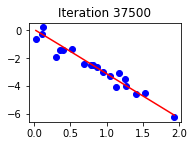

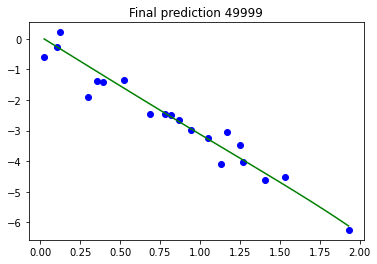

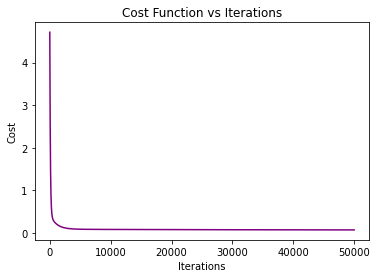

+0.02*x^0-6e+00*x^1-0.2*x^2+0.6*x^3+0.1*x^4-0.5*x^5

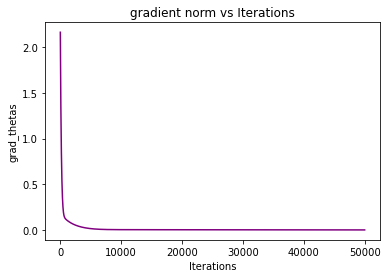

In [26]:

costs = [] 
grad_thetas=[]
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
#scaler = preprocessing.MinMaxScaler()
X_plot_poly_scale = scaler.fit_transform(X_plot_poly)
X_plot_poly=X_plot_poly_scale


for i in range(iterations):
    y_pred = X_poly.dot(theta)
    
    #plot if 1/4 of iterations passed----------
    if i % (iterations // 4) == 0:
        y_pred_plot = X_plot_poly.dot(theta)
        plt.subplot(2, 2, i // (iterations // 4) + 1)
        plt.scatter(X, y, color='blue')
        plt.plot(X_plot, y_pred_plot, color='red')
        plt.title(f"Iteration {i}")
        plt.show()
    
    grad_theta = (1/len(y)) * X_poly.T.dot(y_pred - y)
    theta -= learning_rate * grad_theta
    grad_thetas.append(np.linalg.norm(grad_theta,2))
    
    cost = np.mean((y_pred - y) ** 2) / 2
    costs.append(cost)


y_pred_plot = X_plot_poly.dot(theta)
plt.scatter(X, y, color='blue')
plt.plot(X_plot, y_pred_plot, color='green')
plt.title(f"Final prediction {i}")
plt.show()

plt.plot(range(iterations), costs, color='purple') 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.show()
for j in range(degree1+1):
    print('{:+0.1}*x^{}'.format(*theta[j],j),end="")


plt.plot(range(iterations), grad_thetas, color='purple') 
plt.xlabel('Iterations')
plt.ylabel('grad_thetas')
plt.title('gradient norm vs Iterations')
plt.show()
